# Problem Statement : 
**Implement a KNN model to classify the animals in to categorie**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Zoo.csv")
data.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# EDA and data cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [4]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [5]:
data[data.duplicated()].shape

(0, 18)

In [6]:
data = data.drop_duplicates()

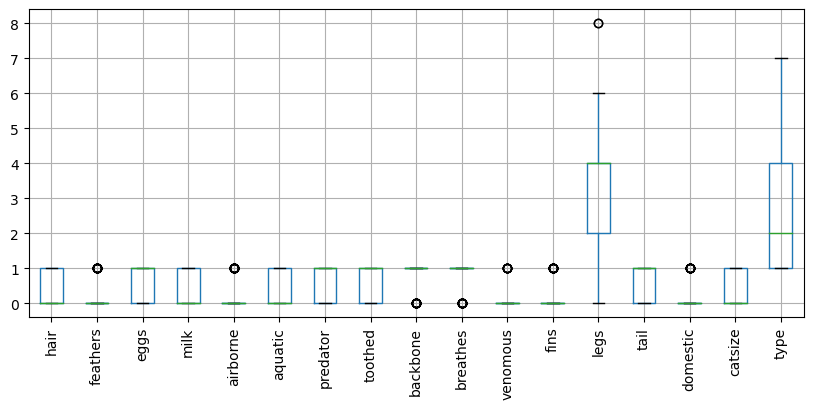

In [7]:
plt.figure(figsize = (10,4))
data.boxplot()
plt.xticks(rotation = 90)
plt.show()

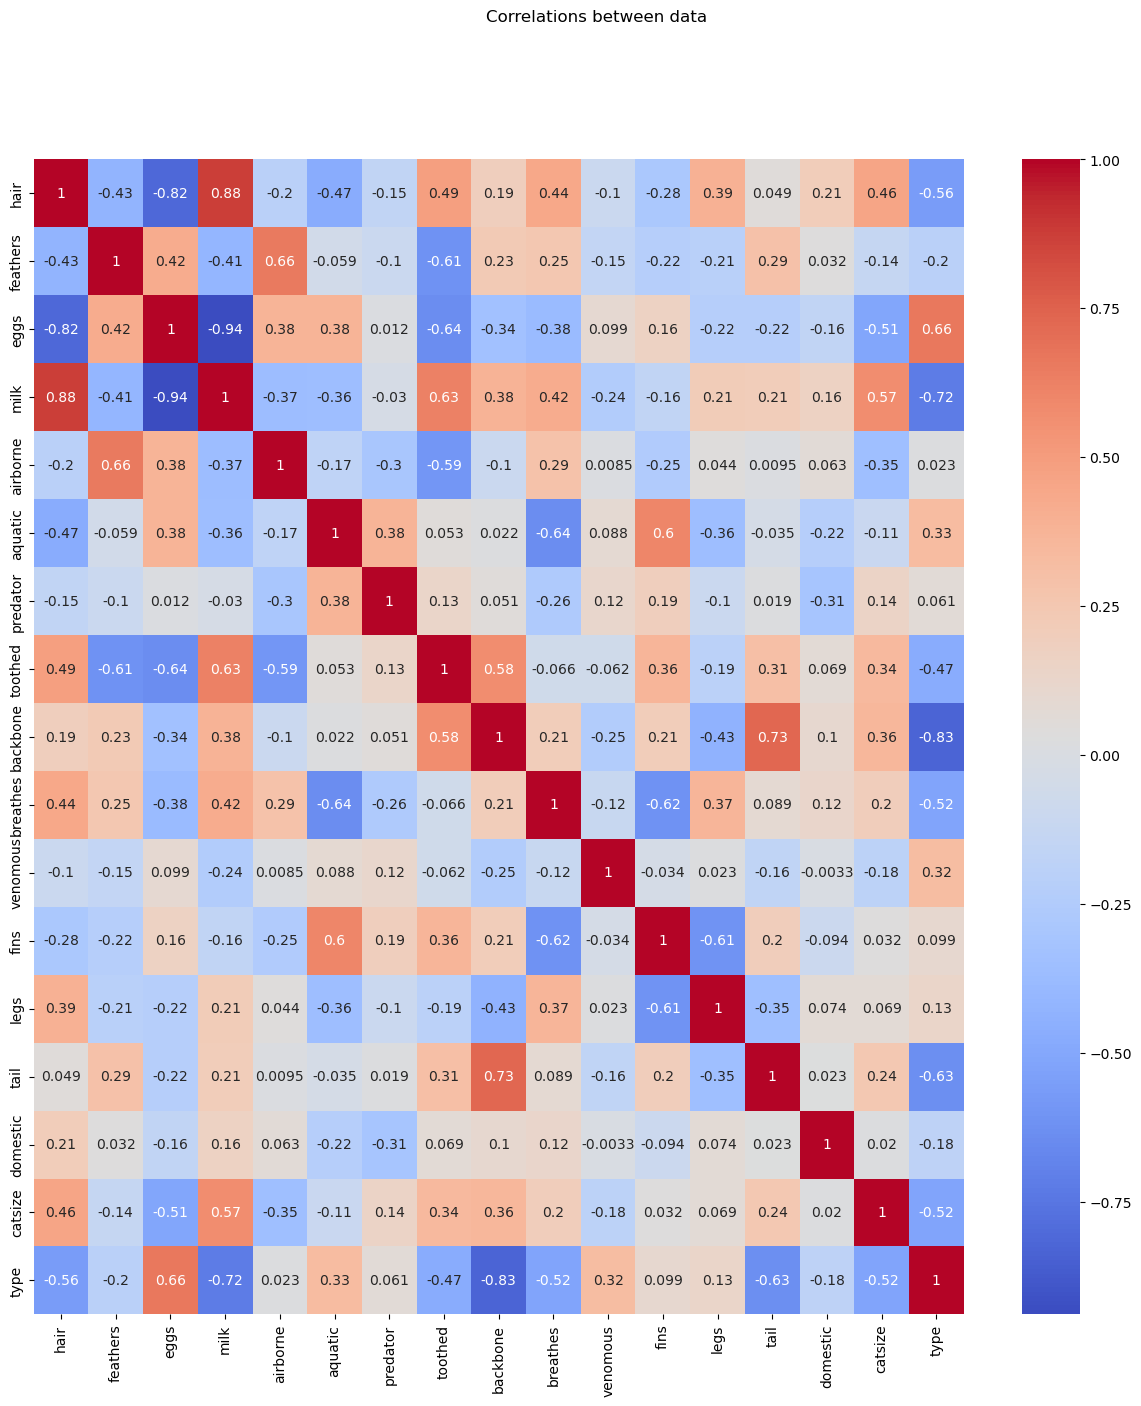

In [8]:
fig, ax = plt.subplots(figsize=(15,15))
# Plot the heatmap using seaborn's heatmap function
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', ax=ax)
# Set a title for the figure
fig.suptitle('Correlations between data')
# Display the heatmap
plt.show()

<AxesSubplot:xlabel='type', ylabel='count'>

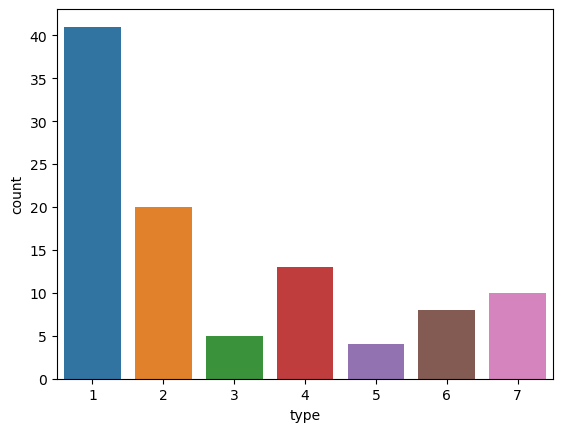

In [9]:
sns.countplot(data.type)

In [10]:
# data standardization
df = data.drop(["type","animal name"], axis = 1)
scaler = StandardScaler()
df_norm = scaler.fit_transform(df)
df_new = pd.DataFrame(df_norm)
df_new.columns = df.columns
df_new.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180


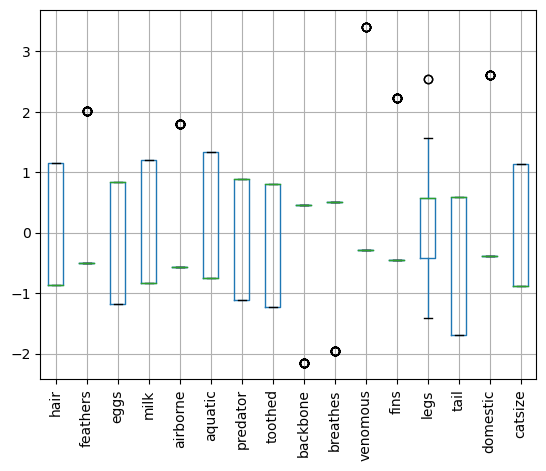

In [11]:
df_new.boxplot()
plt.xticks(rotation = 90)
plt.show()

# model building

In [22]:
X = df_new
Y = data.type
x_train, x_test,y_train,y_test  = train_test_split(X, Y, test_size=0.30,random_state=20)

In [23]:
model = KNeighborsClassifier()
param_grid = {'n_neighbors': range(1, 25),
            'weights': ['uniform', 'distance'],
             'metric':['Euclidean', 'manhattan']}
param_grid

{'n_neighbors': range(1, 25),
 'weights': ['uniform', 'distance'],
 'metric': ['Euclidean', 'manhattan']}

In [24]:
grid = GridSearchCV(estimator=model, param_grid=param_grid,cv=8,scoring='accuracy')
result1=grid.fit(x_train, y_train)

In [25]:
print(grid.best_score_)
print(grid.best_params_)

0.9704861111111112
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}


# model evaluation

In [26]:
model_final = KNeighborsClassifier(n_neighbors=1, weights = 'uniform', metric='manhattan')
model_final.fit(x_train,y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=1)

In [27]:
y_pred = model_final.predict(x_test)
outcome = pd.DataFrame(y_test, columns = ['Type'])
outcome["pred_type"] = y_pred


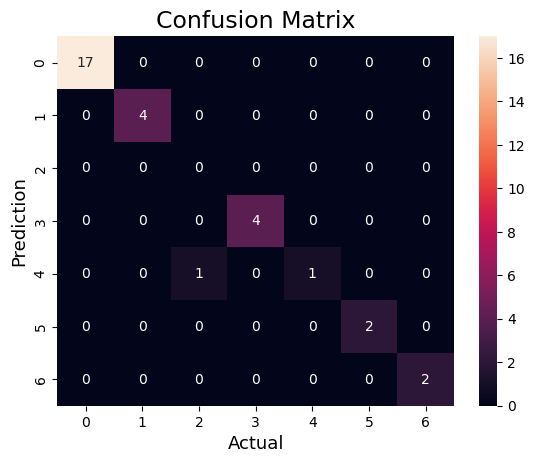

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

Accuracy   : 0.967741935483871


**Finding the best K value**

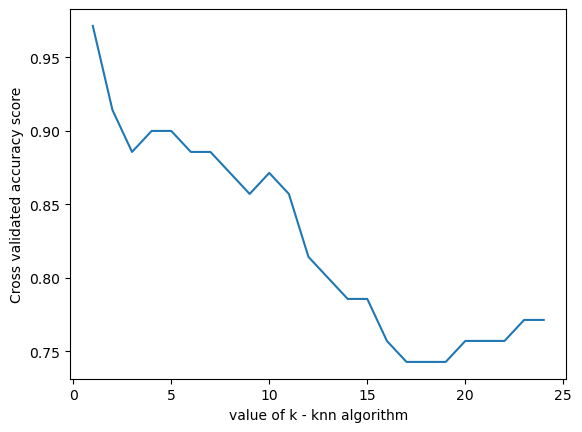

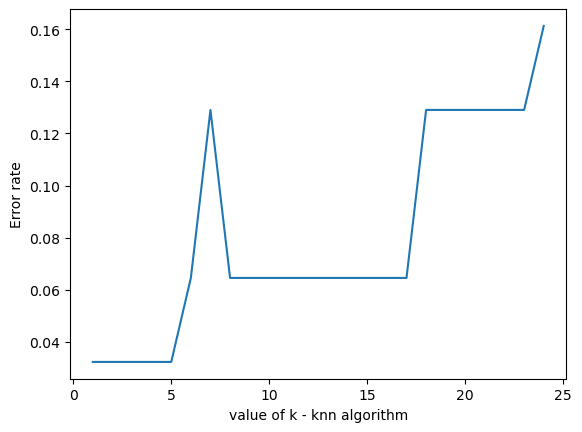

In [30]:
k_range = range(1,25)
k_scores = []
error_rate = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k,weights = 'uniform', metric='manhattan')
    #kscores - accuracy
    scores = cross_val_score(knn,x_train,y_train,cv=5,scoring='accuracy')
    k_scores.append(scores.mean())
    #error rate
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))
#plot k vs accuracy
plt.plot(k_range,k_scores)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Cross validated accuracy score')
plt.show()
#plot k vs error rate
plt.plot(k_range,error_rate)
plt.xlabel('value of k - knn algorithm')
plt.ylabel('Error rate')
plt.show()

**with k = 5**

In [33]:
model_k5 = KNeighborsClassifier(n_neighbors=3, weights = 'uniform', metric='manhattan')
model_k5.fit(x_train,y_train)
y_pred = model_k5.predict(x_test)
outcome = pd.DataFrame(y_test, columns = ['type'])
outcome["pred_type"] = y_pred
outcome

,type,pred_type
49,1,1
47,1,1
2,4,4
55,1,1
31,1,1
38,4,4
12,4,4
37,2,2
0,1,1
46,7,7


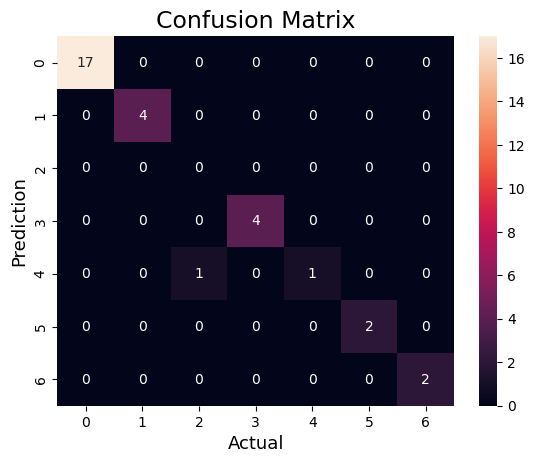

Accuracy   : 0.967741935483871


In [34]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,
            annot=True,
            fmt='g')
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy   :", accuracy)

# Conclusion:
best model parameters : k = 5, matric = manhatten and weights = uniform  
accuracy = 0.968